In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,6)
sns.set_style('darkgrid')

In [65]:
data = pd.read_csv('classification.csv')

In [66]:
data.head()

,actual,predicted
0,0,0.305904
1,0,0.578251
2,0,0.156959
3,0,0.742309
4,0,0.239494


In [67]:
y_true = data.actual.values
y_pred = data.predicted.values

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

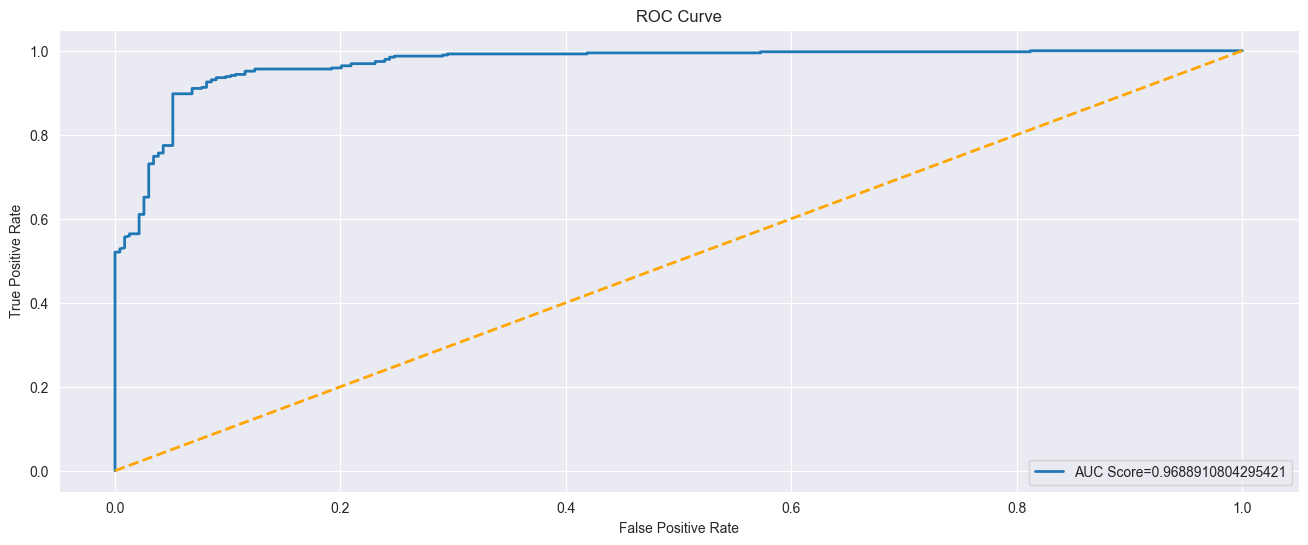

In [69]:
plt.plot(fpr,tpr,label="AUC Score="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Scenario 1: Credit Card Default

Decrease **False Positives**

In [70]:
y_pred[y_pred>=0.8] = 1
y_pred[y_pred<0.8] = 0

In [71]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       234
           1       0.87      0.98      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.87      0.88       624
weighted avg       0.90      0.90      0.89       624



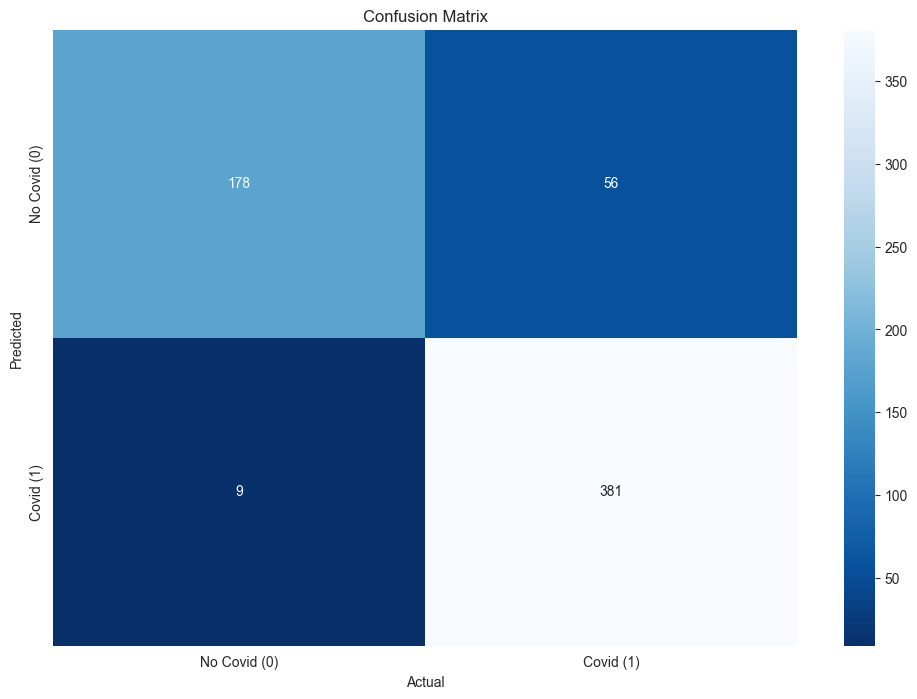

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,cmap='Blues_r',fmt='.3g',
            xticklabels=['No Covid (0)','Covid (1)'], yticklabels=['No Covid (0)','Covid (1)'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()